## Geeley Auto Logistic Regression Assignment

#Problem Statement: A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing 
unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. 
Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be
very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car

#Business Goal:- Model the price of cars with the available independent variables. It will be used by the management to 
understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars,
the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the
pricing dynamics of a new market. 

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Let us first import NumPy and Pandas and read the housing dataset
# Importing all required packages
import numpy as np
import pandas as pd


In [3]:
# Reading the given data set CarPrice_Assignment.csv into a data frame auto_df. The data set CarPrice_Assignment.csv should be
# placed in the same folder as the ipynb file
auto_df = pd.read_csv('CarPrice_Assignment.csv')
auto_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
auto_df.info()
auto_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

(205, 26)

In [5]:
# As we can see there are no null values so we dont need to worry about missing values or nulls

# Checking columns
auto_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
# Inspecting if any of the columns has only one unique value
print(auto_df.car_ID.unique())
print(auto_df.symboling.unique())
print(auto_df.CarName.unique())
print(auto_df.fueltype.unique())
print(auto_df.aspiration.unique())
print(auto_df.doornumber.unique())
print(auto_df.carbody.unique())
print(auto_df.drivewheel.unique())
print(auto_df.enginelocation.unique())
print(auto_df.wheelbase.unique())
print(auto_df.carlength.unique())
print(auto_df.carwidth.unique())
print(auto_df.carheight.unique())
print(auto_df.curbweight.unique())
print(auto_df.enginetype.unique())
print(auto_df.cylindernumber.unique())
print(auto_df.enginesize.unique())
print(auto_df.fuelsystem.unique())
print(auto_df.boreratio.unique())
print(auto_df.stroke.unique())
print(auto_df.compressionratio.unique())
print(auto_df.horsepower.unique())
print(auto_df.peakrpm.unique())
print(auto_df.citympg.unique())
print(auto_df.highwaympg.unique())



[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
[ 3  1  2  0 -1 -2]
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s 

In [7]:
# All the columns have multiple unique values

# Now, it is given that, here is a variable named CarName which is comprised of two parts - the first word is the name of 
#'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 
# 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

print(auto_df.CarName.unique())

# Looking at the CarName, we need to first make a new column car companyl
# Creating the first Column car company
auto_df['carcompany'] =auto_df['CarName'].apply(lambda x:x.split(' ')[0])

print( "\nUnique Car company Names :- ")
print(auto_df['carcompany'].unique())

# If we look at the various car company names we will find that 'maxda' and 'mazda' are different spellings of same name.
# Similarly 'Nissan' and 'nissan, 'porsche' and 'porcshce', 'toyota' and 'toyouta', 'vokswagen' , 'volkswagen' and 'vw' are
# also different spellings of same name. So, let's standrdize on right spelling for all these

auto_df['carcompany'].replace('maxda','mazda',inplace=True)
auto_df['carcompany'].replace('Nissan','nissan',inplace=True)
auto_df['carcompany'].replace('porcshce','porsche',inplace=True)
auto_df['carcompany'].replace('toyouta','toyota',inplace=True)
auto_df['carcompany'].replace('vokswagen','volkswagen',inplace=True)
auto_df['carcompany'].replace('vw','volkswagen',inplace=True)

print( "\n Unique Car company Names after required corrections :- ")
print(auto_df['carcompany'].unique())




['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [8]:
# Let's drop the column CarName now as we already have carved company name of it
auto_df.drop(columns=['CarName'],inplace=True)

auto_df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'carcompany'],
      dtype='object')

In [9]:
print(auto_df['car_ID'].nunique())

# Let's drop the column car_ID also because it has all unique values
auto_df.drop(columns=['car_ID'],inplace=True)





205


## Step 2: Visualising the Data

In [10]:
# Let's now spend some time visualising the data.

# If there is some obvious multicollinearity going on, this is the first place to catch it
# Also, if any predictors directly have a strong association with the outcome variable it will be caught here

In [11]:
# We'll visualise our data using matplotlib and seaborn.
# Let's make a pairplot of all the numeric variables
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

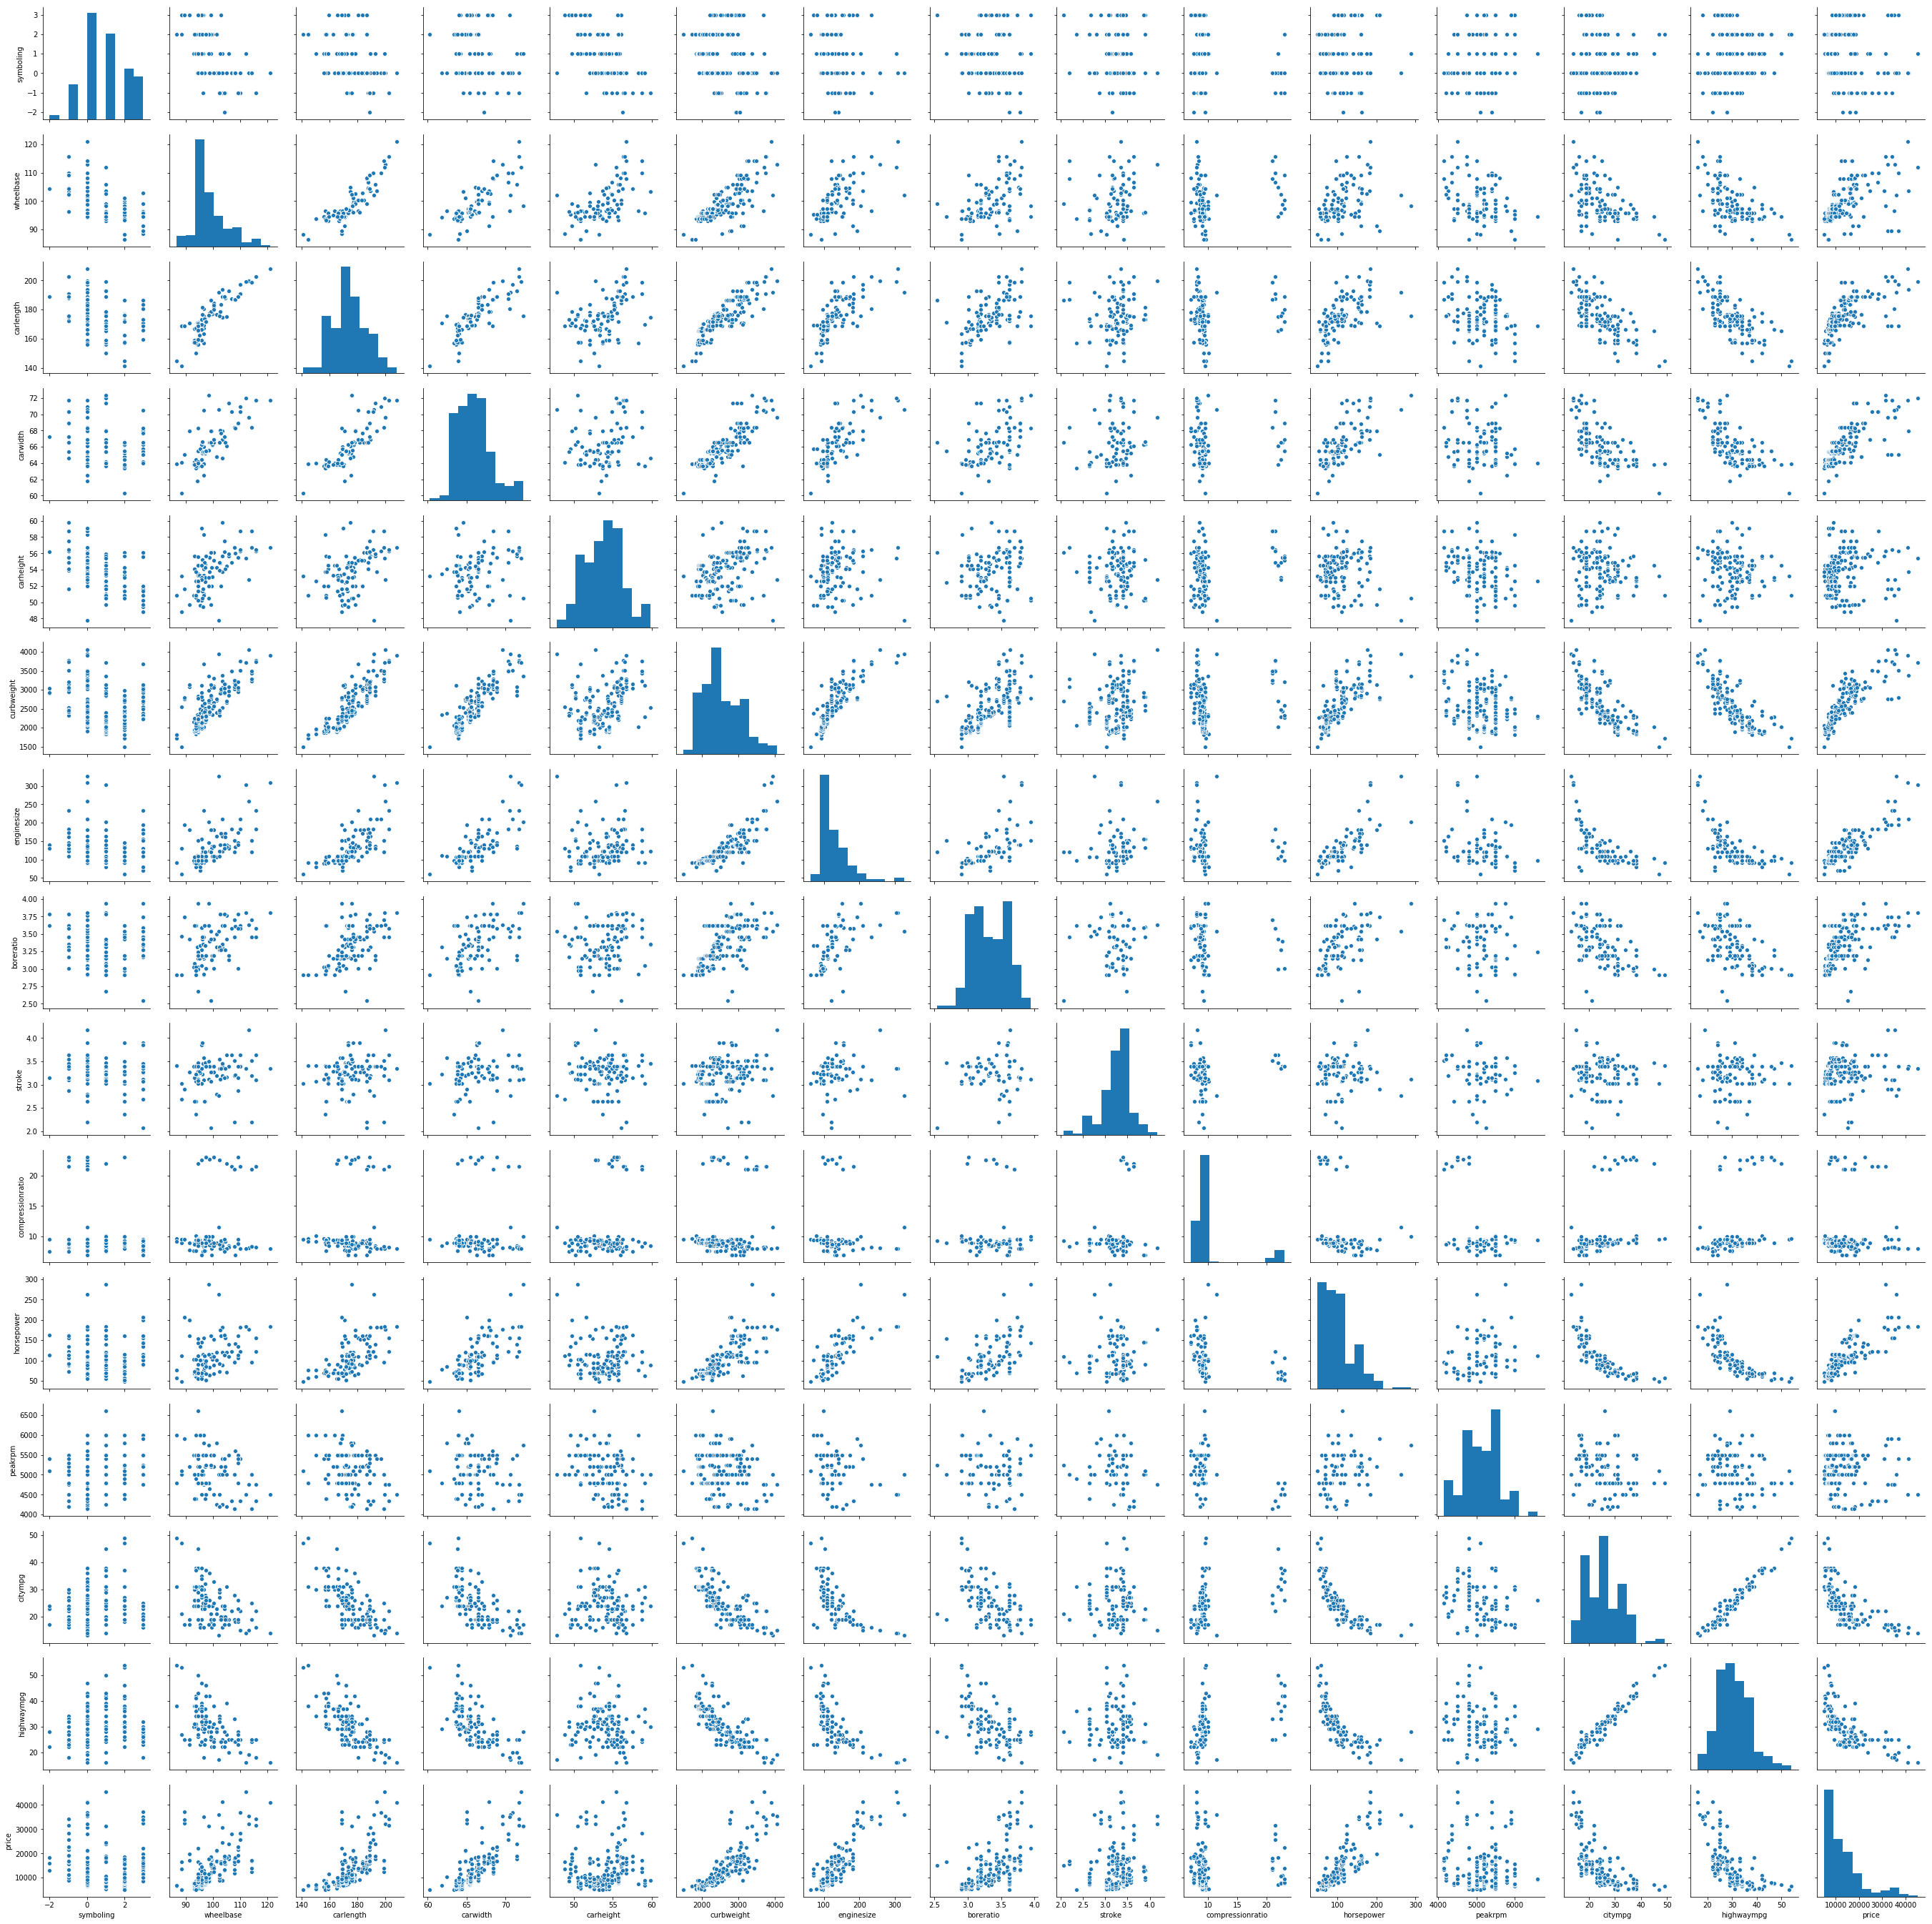

In [12]:
sns.pairplot(auto_df)
plt.show()

#### Visualising Categorical Variables
There are a few categorical variables as well. Let's make a boxplot for some of these variables.

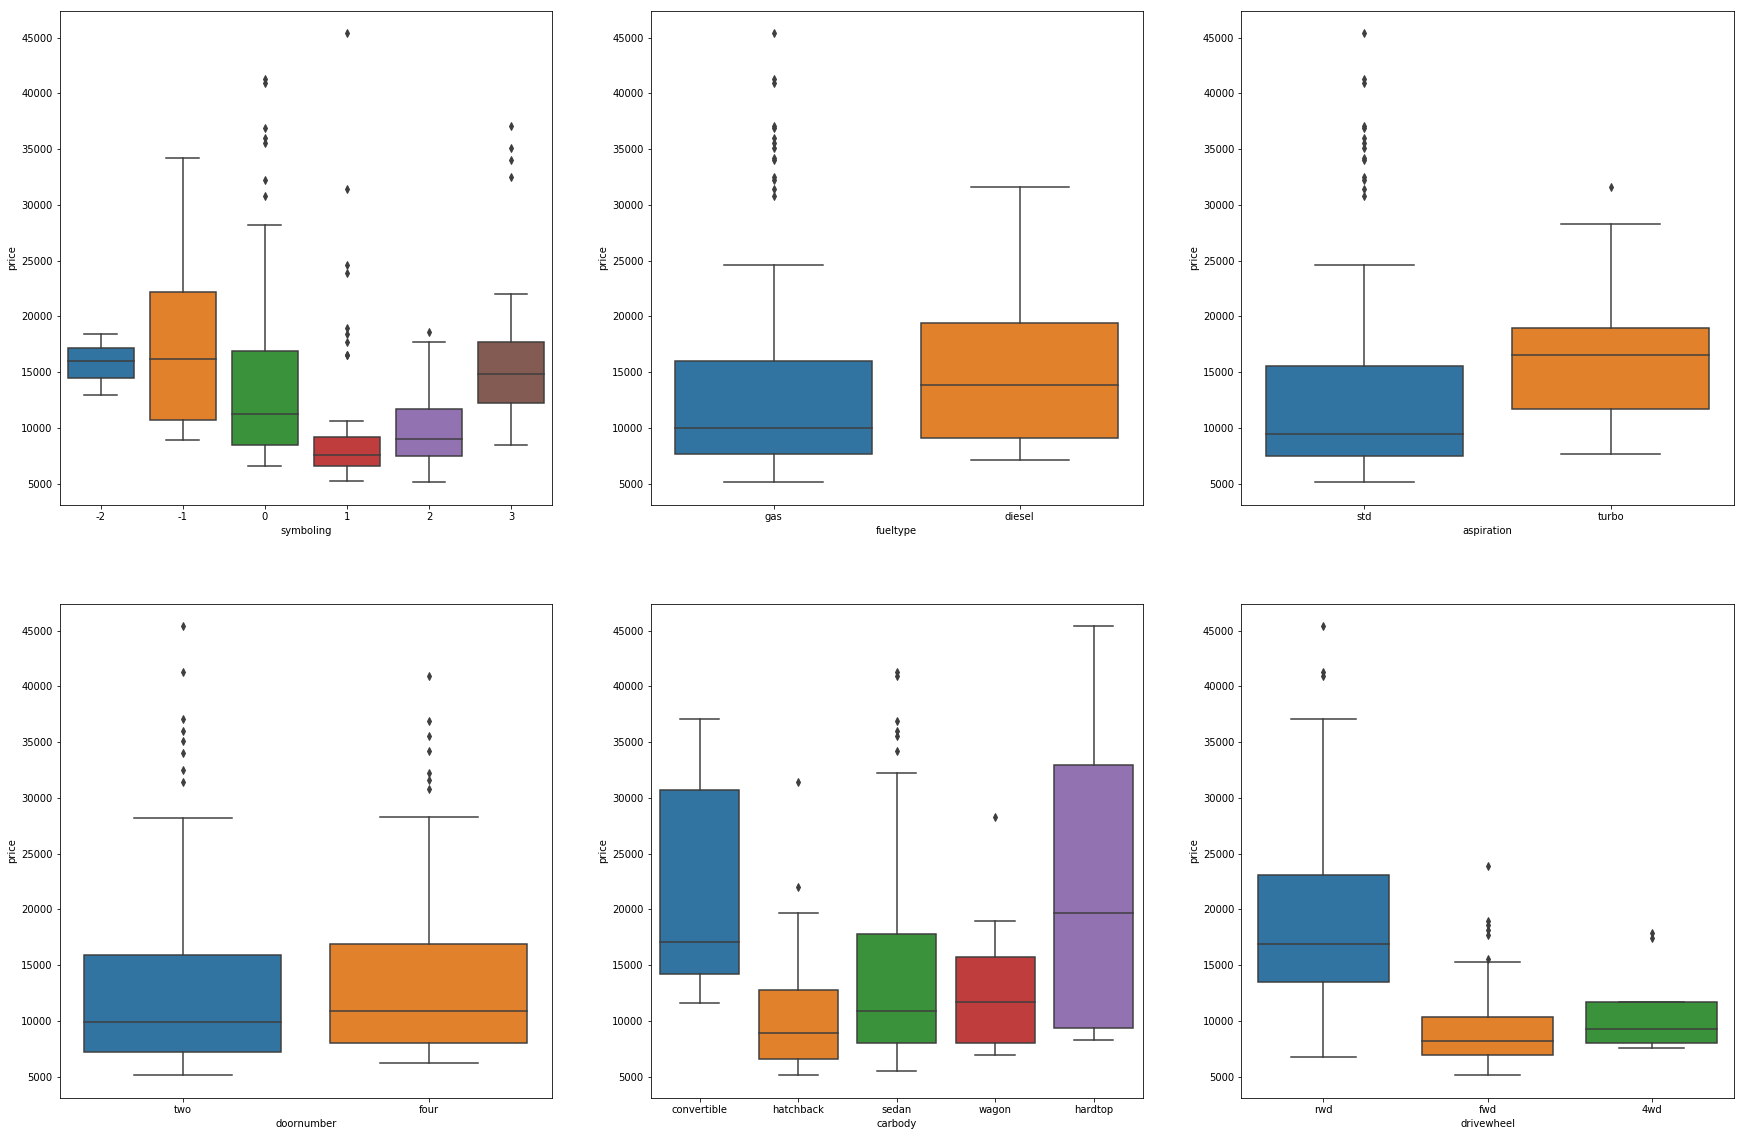

In [13]:
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = auto_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = auto_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = auto_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = auto_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = auto_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto_df)

plt.show()

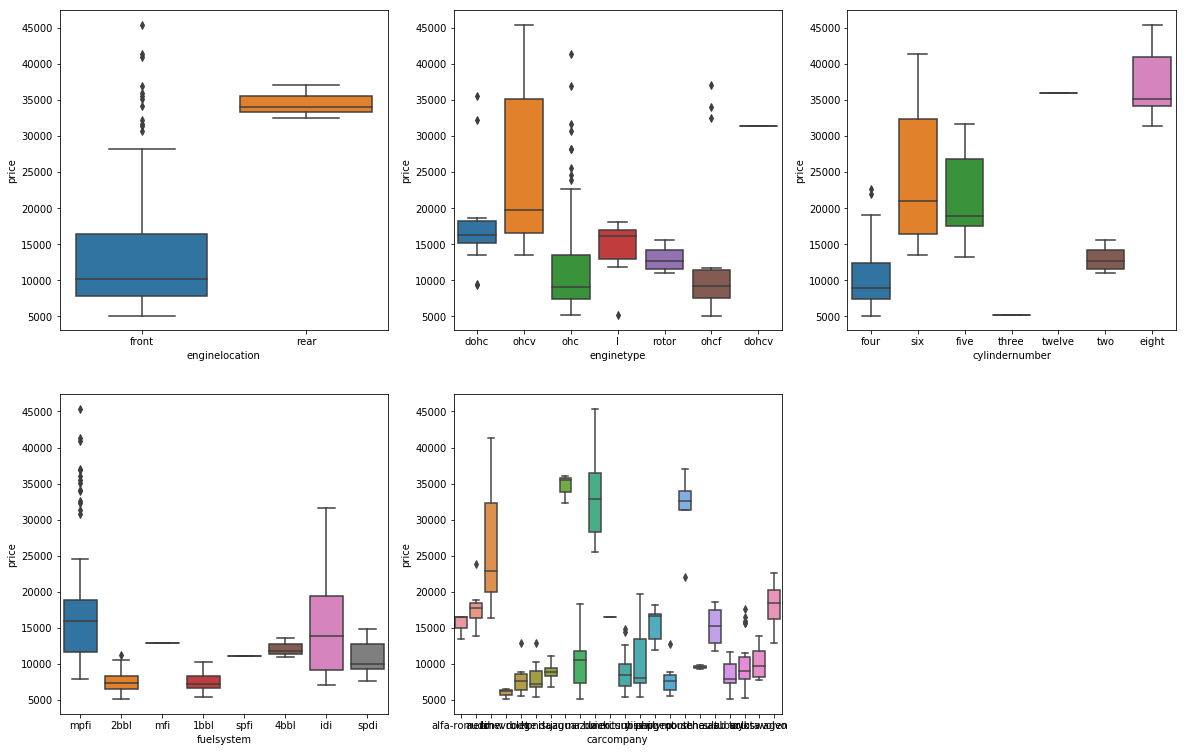

In [14]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = auto_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = auto_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = auto_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'carcompany', y = 'price', data = auto_df)
plt.show()

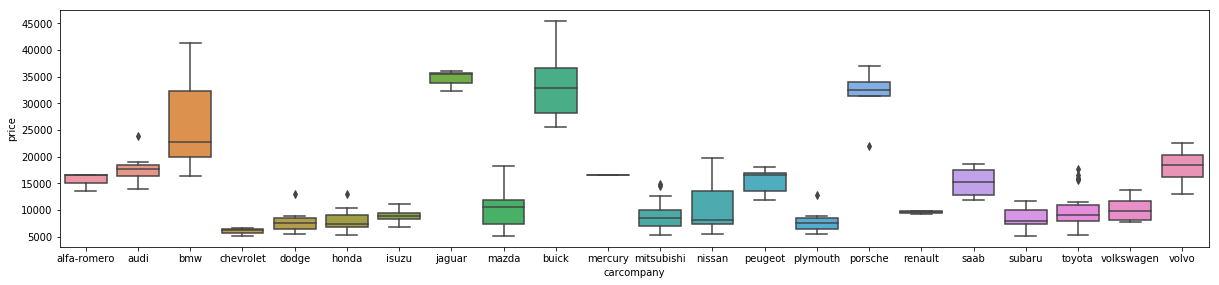

In [15]:
plt.figure(figsize=(70, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'carcompany', y = 'price', data = auto_df)
plt.show()

## Step 3: Data Preparation

#### Dummy variables

In [16]:
# In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert 
# categorical variables to numeric form. So, ordinal categorical variables will be replaced by same numeric values.
# Other categorical variables will be converted to dummy variables
# The various categorical variables are :- 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
# 'enginelocation', 'enginetype', 'cylindernumber' and 'fuelsystem'


dummy_vars = pd.get_dummies(auto_df[['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber', 'fuelsystem','carcompany']], drop_first = True)
model_df = pd.concat([auto_df,dummy_vars],axis=1)

model_df.drop(columns=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber', 'fuelsystem','carcompany'], inplace=True)

model_df.columns
model_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(model_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features
it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

We will apply Min-Max scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio',\
            'stroke','compressionratio', 'horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


C:\Users\Karandeep Malik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
print( df_train.head())
print(df_train.describe())

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
122   0.244828   0.426016  0.291667   0.265487    0.272692    0.139623   
125   0.272414   0.452033  0.666667   0.212389    0.500388    0.339623   
166   0.272414   0.448780  0.308333   0.424779    0.314973    0.139623   
1     0.068966   0.450407  0.316667   0.088496    0.411171    0.260377   
199   0.610345   0.775610  0.575000   0.858407    0.647401    0.260377   

     boreratio    stroke  compressionratio  horsepower  ...  \
122   0.230159  0.525253           0.15000    0.083333  ...   
125   1.000000  0.464646           0.15625    0.395833  ...   
166   0.444444  0.449495           0.15000    0.266667  ...   
1     0.626984  0.247475           0.12500    0.262500  ...   
199   0.746032  0.484848           0.03125    0.475000  ...   

     carcompany_nissan  carcompany_peugeot  carcompany_plymouth  \
122                  0                   0                    1   
125                  0                   0

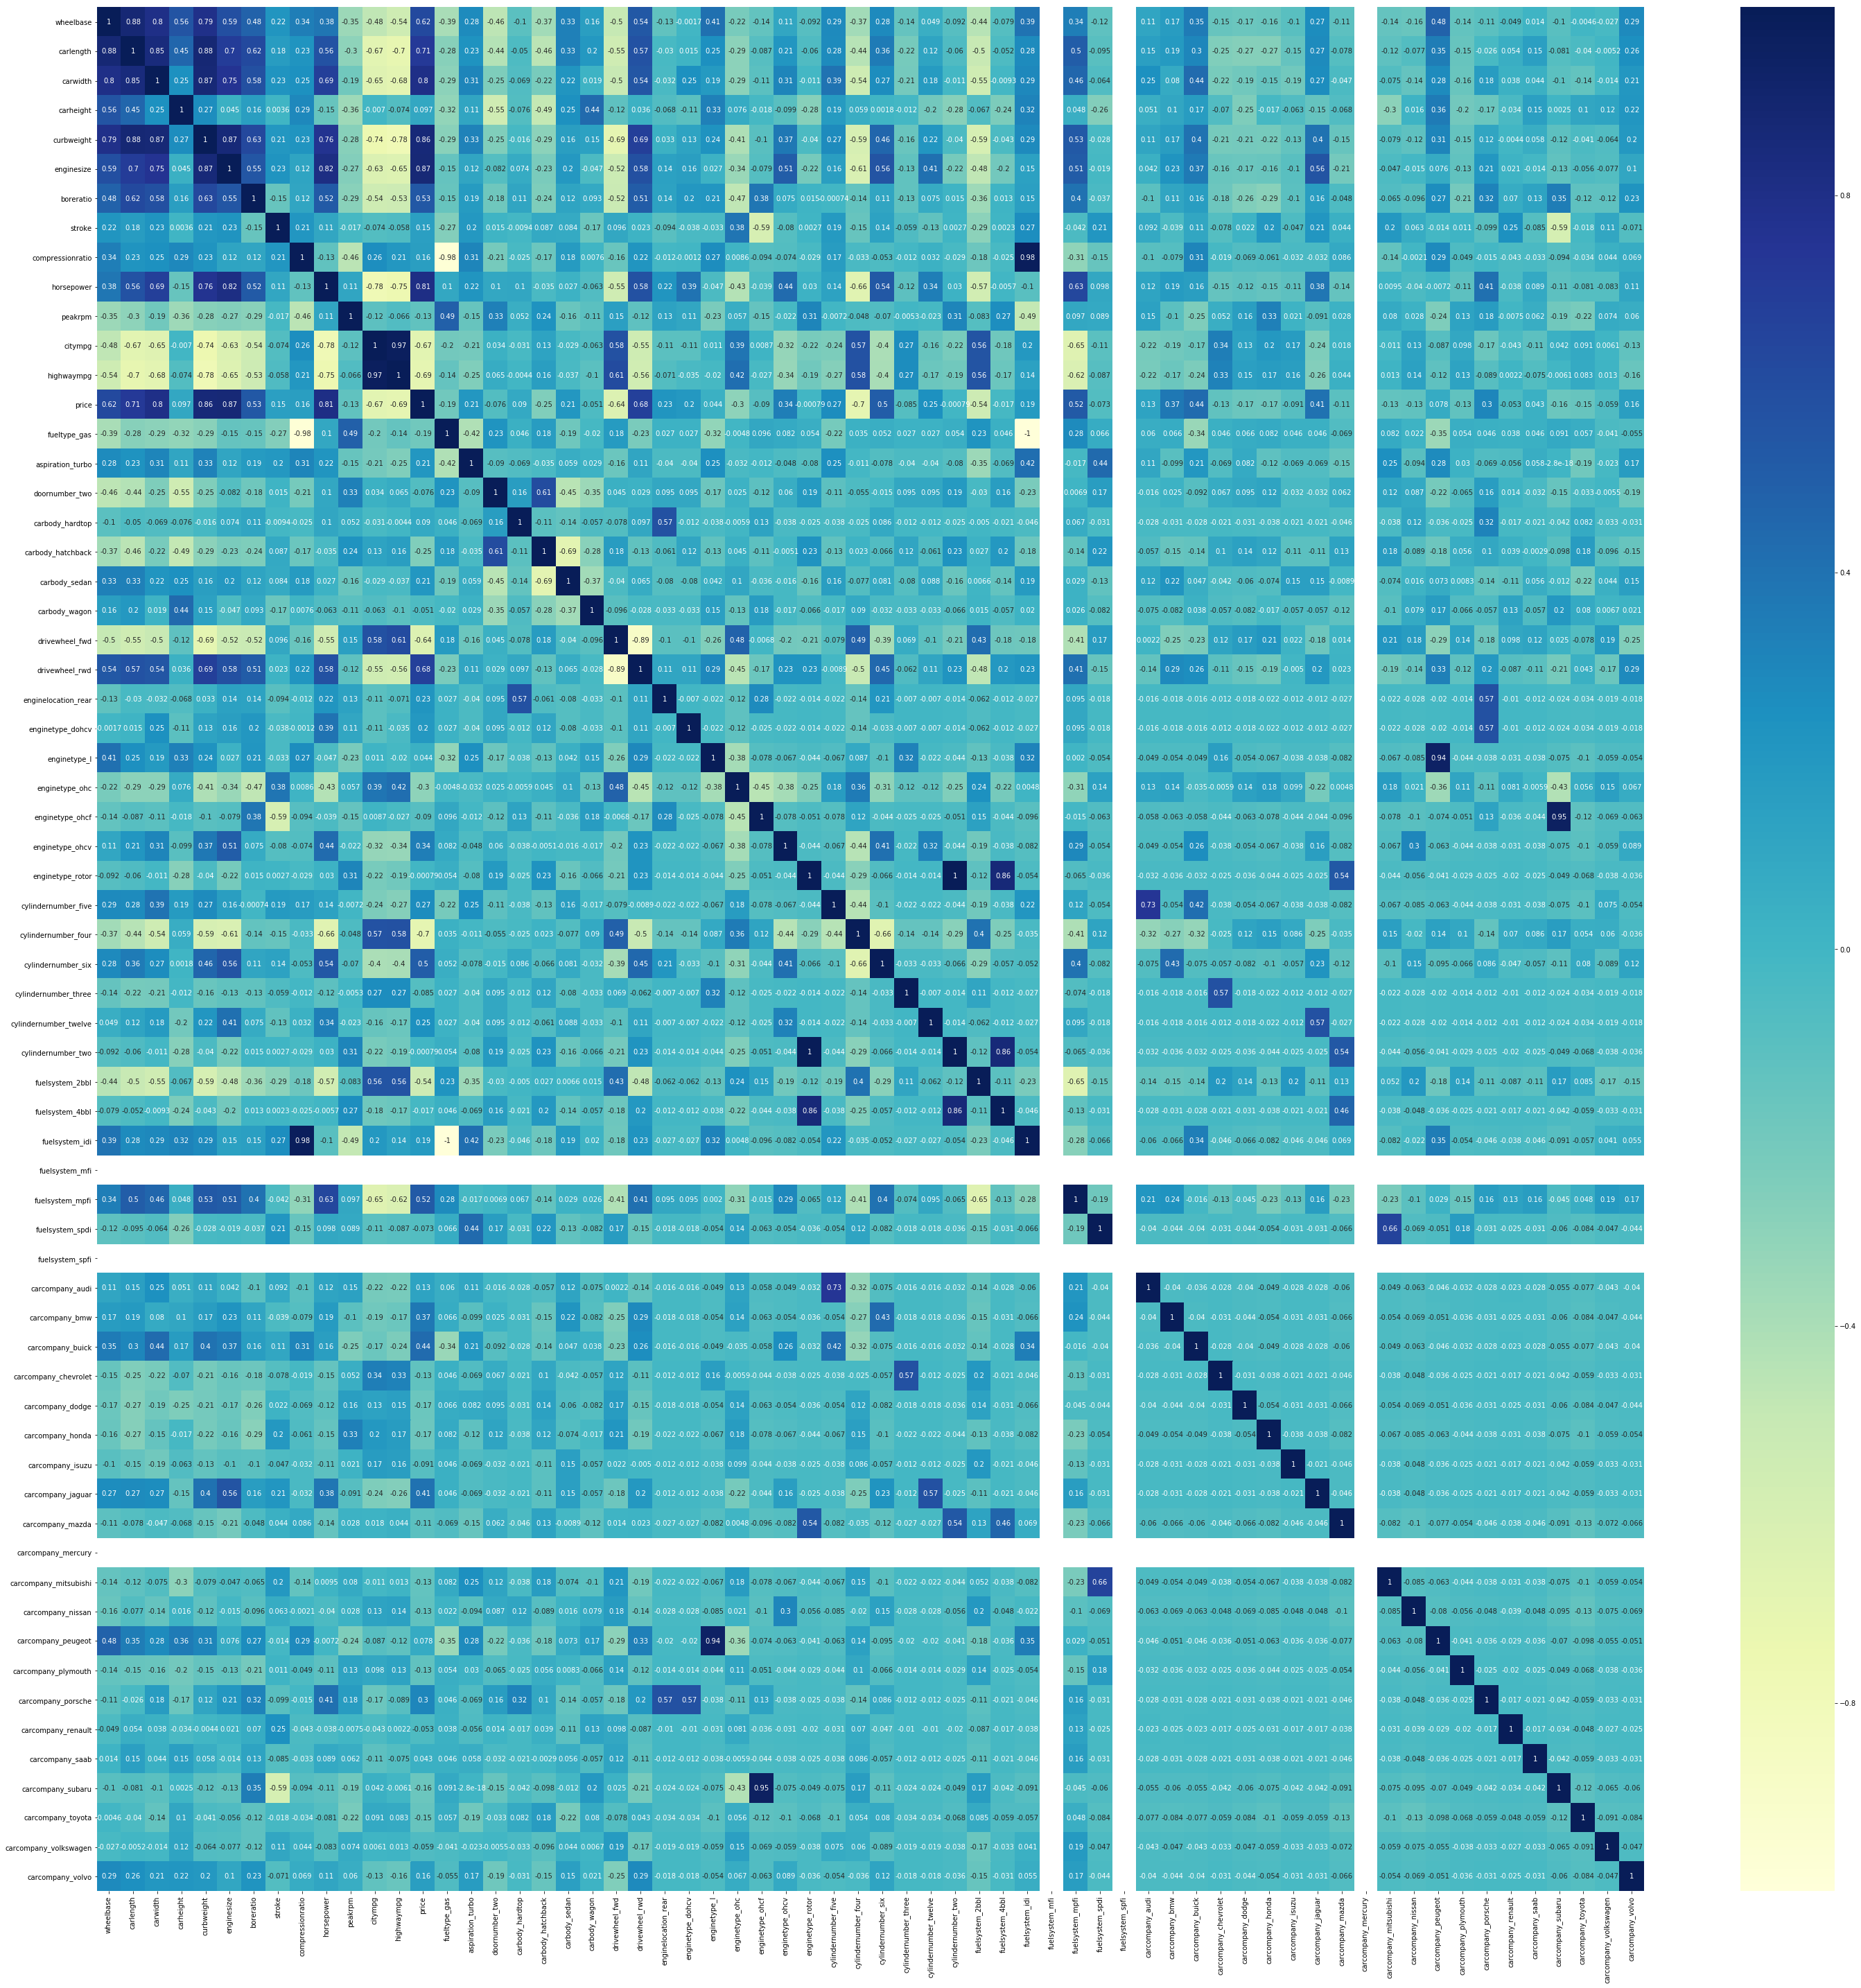

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 50))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can see, enginesize seems to the correlated to price (0.87) the most. Let's see a pairplot for enginesize vs price.

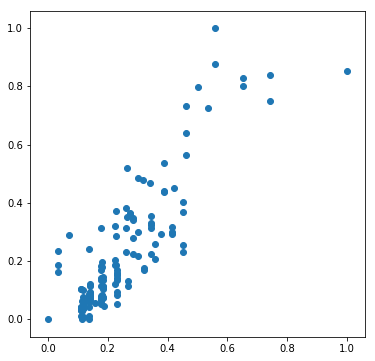

In [21]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

#### Dividing into X and Y sets for the model building

In [22]:
Y_train = df_train.pop('price')
X_train = df_train

#### Building our model
We will be using RFE for building our model 


In [23]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, Y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 12),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 20),
 ('horsepower', False, 10),
 ('peakrpm', False, 11),
 ('citympg', False, 34),
 ('highwaympg', False, 21),
 ('fueltype_gas', False, 24),
 ('aspiration_turbo', False, 9),
 ('doornumber_two', False, 43),
 ('carbody_hardtop', False, 26),
 ('carbody_hatchback', False, 25),
 ('carbody_sedan', False, 27),
 ('carbody_wagon', False, 28),
 ('drivewheel_fwd', False, 44),
 ('drivewheel_rwd', False, 37),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 7),
 ('enginetype_l', False, 2),
 ('enginetype_ohc', False, 45),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', False, 36),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 23),
 ('cylindernumber_three', True, 1),

In [26]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'carcompany_bmw', 'carcompany_peugeot',
       'carcompany_porsche'],
      dtype='object')

In [27]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'carcompany_audi', 'carcompany_buick', 'carcompany_chevrolet',
       'carcompany_dodge', 'carcompany_honda', 'carcompany_isuzu',
       'carcompany_jaguar', 'carcompany_mazda', 'carcompany_mercury',
       'carcompany_mitsubishi', 'carcompany_nissan', 'carcompany_plymouth',
       'carcompany_renault', 'carcompany_saab', 'carcompany_subaru',
       'carcompany_toyota', 'carcompany_volkswagen', 'carcompany_volvo'],


### Building model using statsmodel, for the detailed statistics

In [28]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.03e-70
Time:                        15:46:27   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [29]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [30]:
# Calculate the VIFs for the  model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_rotor,inf
11,cylindernumber_two,inf
2,enginesize,80.71
1,curbweight,54.10
0,carwidth,41.15
3,boreratio,34.56
4,stroke,30.89
8,cylindernumber_four,24.19
10,cylindernumber_twelve,2.81
7,cylindernumber_five,2.67


In [31]:
# Since enginetype_rotor has infinite VF let's drop that first and rebuild model
X_train_new = X_train_rfe.drop(['enginetype_rotor'], axis=1)

##### Rebuilding the model without enginetype_rotor

In [32]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.03e-70
Time:                        15:46:28   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [33]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,80.71
1,curbweight,54.10
0,carwidth,41.15
3,boreratio,34.56
4,stroke,30.89
7,cylindernumber_four,24.19
10,cylindernumber_two,3.95
9,cylindernumber_twelve,2.81
6,cylindernumber_five,2.67
13,carcompany_porsche,1.93


##### Rebuilding the model without engine size

In [34]:
# Since enginesize has high VF let's drop that first and rebuild model
X_train_new = X_train_new.drop(['enginesize'], axis=1)

In [35]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.01e-61
Time:                        15:46:28   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

We observe that cylindernumber_four has very high p-value. So it is mostly insignificant. Removing it and rebuilding model.

##### Rebuilding the model without cylindernumber_four

In [36]:
X_train_new = X_train_new.drop(['cylindernumber_four'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.72e-62
Time:                        15:46:28   Log-Likelihood:                 189.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     130   BIC:                            -314.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

We observe that cylindernumber_five has very high p-value. So it is mostly insignificant. Removing it and rebuilding model.

##### Rebuilding the model without cylindernumber_five

In [37]:
X_train_new = X_train_new.drop(['cylindernumber_five'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.37e-63
Time:                        15:46:28   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

We observe that stroke has very high p-value. So it is mostly insbignificant. Removing it and rebuilding model

##### Rebuilding the model without stroke

In [38]:
X_train_new = X_train_new.drop(['stroke'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.72e-64
Time:                        15:46:28   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

We observe that cylindernumber_two has  high p-value. So it is mostly insignificant. Removing it and rebuilding model

##### Rebuilding the model without cylindernumber_two

In [39]:
X_train_new = X_train_new.drop(['cylindernumber_two'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.09e-64
Time:                        15:46:28   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [40]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,25.25
1,curbweight,23.05
2,boreratio,9.73
8,carcompany_porsche,1.64
3,enginelocation_rear,1.57
7,carcompany_peugeot,1.18
6,carcompany_bmw,1.12
5,cylindernumber_twelve,1.07
4,cylindernumber_three,1.01


##### Rebuilding the model without carwidth

In [41]:
# Since carwidth has high VF let's drop that first and rebuild model
X_train_new = X_train_new.drop(['carwidth'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.28e-60
Time:                        15:46:29   Log-Likelihood:                 173.88
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     134   BIC:                            -303.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.12

We observe that boreratio has very high p-value. So it is mostly insignificant. Removing it and rebuilding model.

##### Rebuilding the model without boreratio

In [42]:
X_train_new = X_train_new.drop(['boreratio'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.97e-60
Time:                        15:46:29   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

We observe that cylindernumber_three has marginally high p-value. So it is  insignificant. Removing it and rebuilding model.

##### Rebuilding the model without cylindernumber_three

In [43]:
X_train_new = X_train_new.drop(['cylindernumber_three'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.77e-61
Time:                        15:46:29   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

In [44]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,carcompany_porsche,1.55
1,enginelocation_rear,1.50
0,curbweight,1.33
4,carcompany_peugeot,1.16
3,carcompany_bmw,1.09
2,cylindernumber_twelve,1.04


###### Since the p-values of remaining variables are all under 0.5 and VIF is under 5, we can consider this a model

##### The model has a good R-Squared value of 0.883, Adjusted R-Squared Value of 0.880, F-Statistics  170.9.
##### It looks like a good fit

### Residual Analysis of the train data

In [45]:
Y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

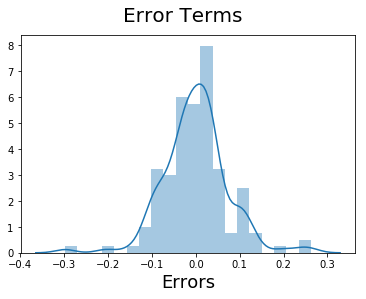

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Making Predictions Using the Final Model¶
It's time to go ahead and make predictions using the final model.

##### Applying the scaling on the test sets

In [47]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio',\
            'stroke','compressionratio', 'horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carcompany_nissan,carcompany_peugeot,carcompany_plymouth,carcompany_porsche,carcompany_renault,carcompany_saab,carcompany_subaru,carcompany_toyota,carcompany_volkswagen,carcompany_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X_test and y_test

In [48]:
print(df_test.columns)
Y_test = df_test.pop('price')
X_test = df_test

# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)


# Creating X_test_new dataframe by dropping variables from X_test_new

X_test_new = X_test_new.drop(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'carcompany_audi', 'carcompany_buick', 'carcompany_chevrolet',
       'carcompany_dodge', 'carcompany_honda', 'carcompany_isuzu',
       'carcompany_jaguar', 'carcompany_mazda', 'carcompany_mercury',
       'carcompany_mitsubishi', 'carcompany_nissan', 'carcompany_plymouth',
       'carcompany_renault', 'carcompany_saab', 'carcompany_subaru',
       'carcompany_toyota', 'carcompany_volkswagen', 'carcompany_volvo','enginetype_rotor','enginesize',
        'cylindernumber_four','cylindernumber_five','stroke','cylindernumber_two','carwidth','boreratio','cylindernumber_three'], axis = 1)


Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'carcompany_audi',
       'carcompany_bmw', 'carcompany_buick', 'carcompany_chevrolet',
       'carcompany_dodge', 'carcompany_honda', 'carcompany_isuzu',
       'car

In [49]:
y_pred_new = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

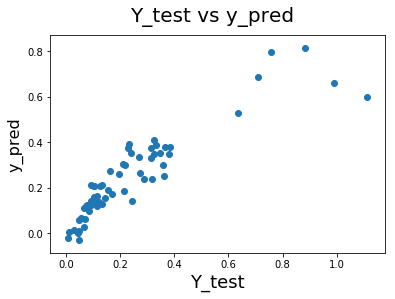

In [50]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, y_pred_new)
fig.suptitle('Y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('Y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

Text(0, 0.5, 'Price')

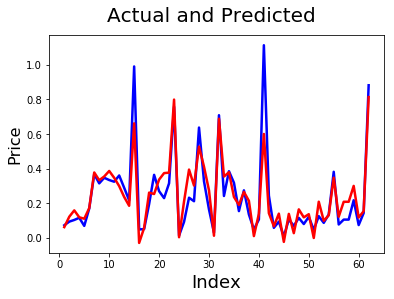

In [51]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_new, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

### Calculating the R-squared Score on Test Set

In [52]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred_new)

0.8129491155105666

We can see that the equation of our best fitted line is:

𝑝𝑟𝑖𝑐𝑒= 0.8563 × curbweight + 0.3072 × enginelocation_rear + 0.1751 × cylindernumber_twelve + 0.2492 * carcompany_bmw 
      - 0.1515 x carcompany_peugeot + 0.2101 × carcompany_porsche - 0.1397
    
So, the factors that affect price are:- 
    Curb Weight of Car , Rear Engine Location, Number of Cylinders = 12 , Company Brand - BMW and Porsche - positive
    correlation and company Peugeot - negative correlation.